# Advanced Topics in Data Science/Machine Learning. Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

## Artificial Neural Networks with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

In [23]:
# "Sequential" models let usv define a stack of neural network layers
from keras.models import Sequential

# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np

In [24]:
# import some utilities to transform/preprocess our data:

from keras.utils import np_utils

#### Let's start with a well-known hand-written digit dataset named MNIST. It is a simple but big enough dataset (70,000 samples) (wikipedia.org/wiki/MNIST_database). 

In [25]:
# Keras will download MNIST digit dataset for us:
from keras.datasets import mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


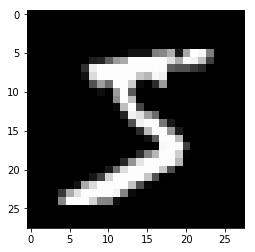

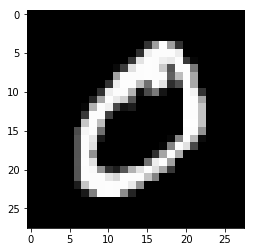

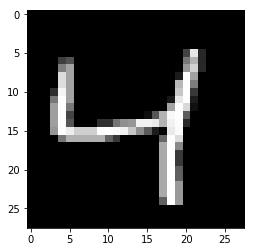

In [27]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[0,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap=plt.cm.gray)
plt.show()
imgplot = plt.imshow(X_train[2,:,:],cmap=plt.cm.gray)
plt.show()

In [28]:
# Reshape the the pixels into a line:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [29]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [30]:
# print(X_train[0,:])

In [31]:
# simply scale the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [32]:
# print(X_train[0,:])

In [33]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [34]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [13]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10,:])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [14]:
# Declare Sequential model to build our network:
model = Sequential()

In [15]:
input_size = 784
hidden_neurons = 100
out_size = 10

In [16]:
## Designing the NN Structure:

# -----------------------------------------
# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: output layer:
model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
model.add(Activation('softmax')) # Activation


Instructions for updating:
Colocations handled automatically by placer.


## Compile the model:
#### We need to compile the model to establish the network and define the methods. Then it will be ready to train it:

In [17]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

## Training:

In [18]:
# fitted_model = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1)
fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=15, verbose=1)


# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iterations over the entire x and y training data. 
# verbose: 0, 1, or 2. how to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Instructions for updating:
Use tf.cast instead.
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 3s 85us/step - loss: 0.5016 - acc: 0.8772 - val_loss: 0.2821 - val_acc: 0.9204
Epoch 2/15
40199/40199 [==============================] - 2s 51us/step - loss: 0.2385 - acc: 0.9318 - val_loss: 0.2210 - val_acc: 0.9363
Epoch 3/15
40199/40199 [==============================] - 3s 62us/step - loss: 0.1831 - acc: 0.9477 - val_loss: 0.1834 - val_acc: 0.9477
Epoch 4/15
40199/40199 [==============================] - 2s 54us/step - loss: 0.1479 - acc: 0.9575 - val_loss: 0.1600 - val_acc: 0.9525
Epoch 5/15
40199/40199 [==============================] - 2s 51us/step - loss: 0.1230 - acc: 0.9649 - val_loss: 0.1465 - val_acc: 0.9583
Epoch 6/15
40199/40199 [==============================] - 2s 52us/step - loss: 0.1041 - acc: 0.9704 - val_loss: 0.1341 - val_acc: 0.9605
Epoch 7/15
40199/40199 [==============================] - 6s 158us/step - loss: 

In [19]:
# Training with Validation:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss',  min_delta=0.1, patience=3)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, callbacks=[early_stopping], batch_size=32, epochs=10, verbose=1)

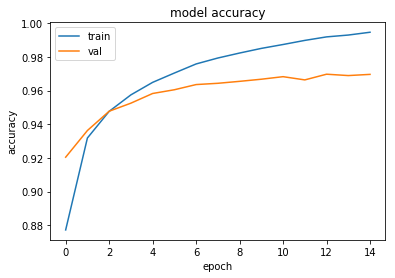

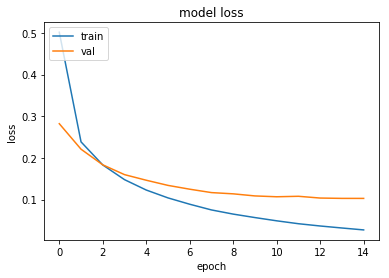

In [20]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# print(fitted_model.history)


## Testing, Prediction, Evaluation:

In [21]:
# Prediction:
y_pridict = model.predict(X_test, verbose=1)
print (y_pridict.shape)

10000/10000 [==============================] - 0s 15us/step
(10000, 10)


In [22]:
# Evaluation:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 0s 15us/step
The accuracy is:  0.9728
